In [1]:
import matplotlib.pyplot as plt
import pandas as pd

# Raw data including the "perfect" value measured by the "ideal" sensor

In [102]:
df = pd.read_csv("../results/proximity.csv")
df

,thymio,laser,perfect
0,4259.199804,4310.513160,0.001952
1,4261.511730,4301.041045,0.002355
2,4227.719917,4289.661430,0.002757
3,4358.481818,4340.531197,0.003160
4,4308.169443,4327.301792,0.003562
...,...,...,...
2645,0.000000,0.000000,0.000000
2646,0.000000,0.000000,0.000000
2647,0.000000,0.000000,0.000000
2648,0.000000,0.000000,0.000000


# pearson correlation
Because the values on their own are not really comparable the correlation index is calculated

In [109]:
thymioSensorCorrelation = df["thymio"].corr(other = df["perfect"], method="pearson")
thymioSensorCorrelation

-0.3976186365592453

In [110]:
laserSensorCorrelation = df["laser"].corr(other = df["perfect"], method="pearson")
laserSensorCorrelation

-0.3997807209230453

# Real values

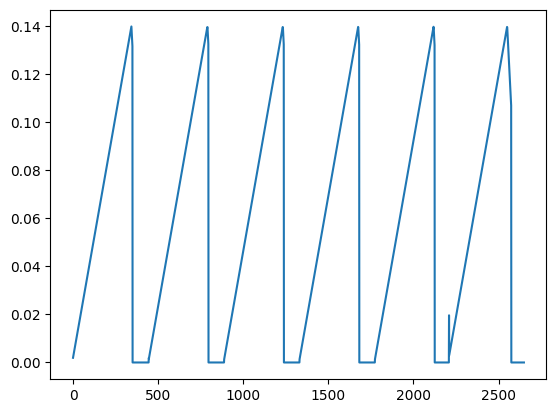

In [96]:
plt.plot(df.perfect)
plt.show()

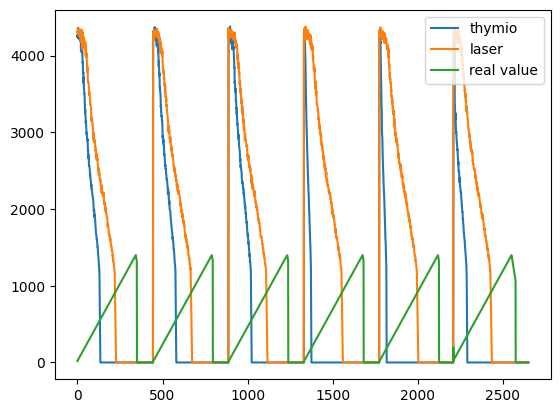

In [116]:
plt.plot(df.thymio, label = "thymio")
plt.plot(df.laser, label = "laser")
plt.plot(df.perfect * 10000, label = "real value")
plt.legend()
plt.show()

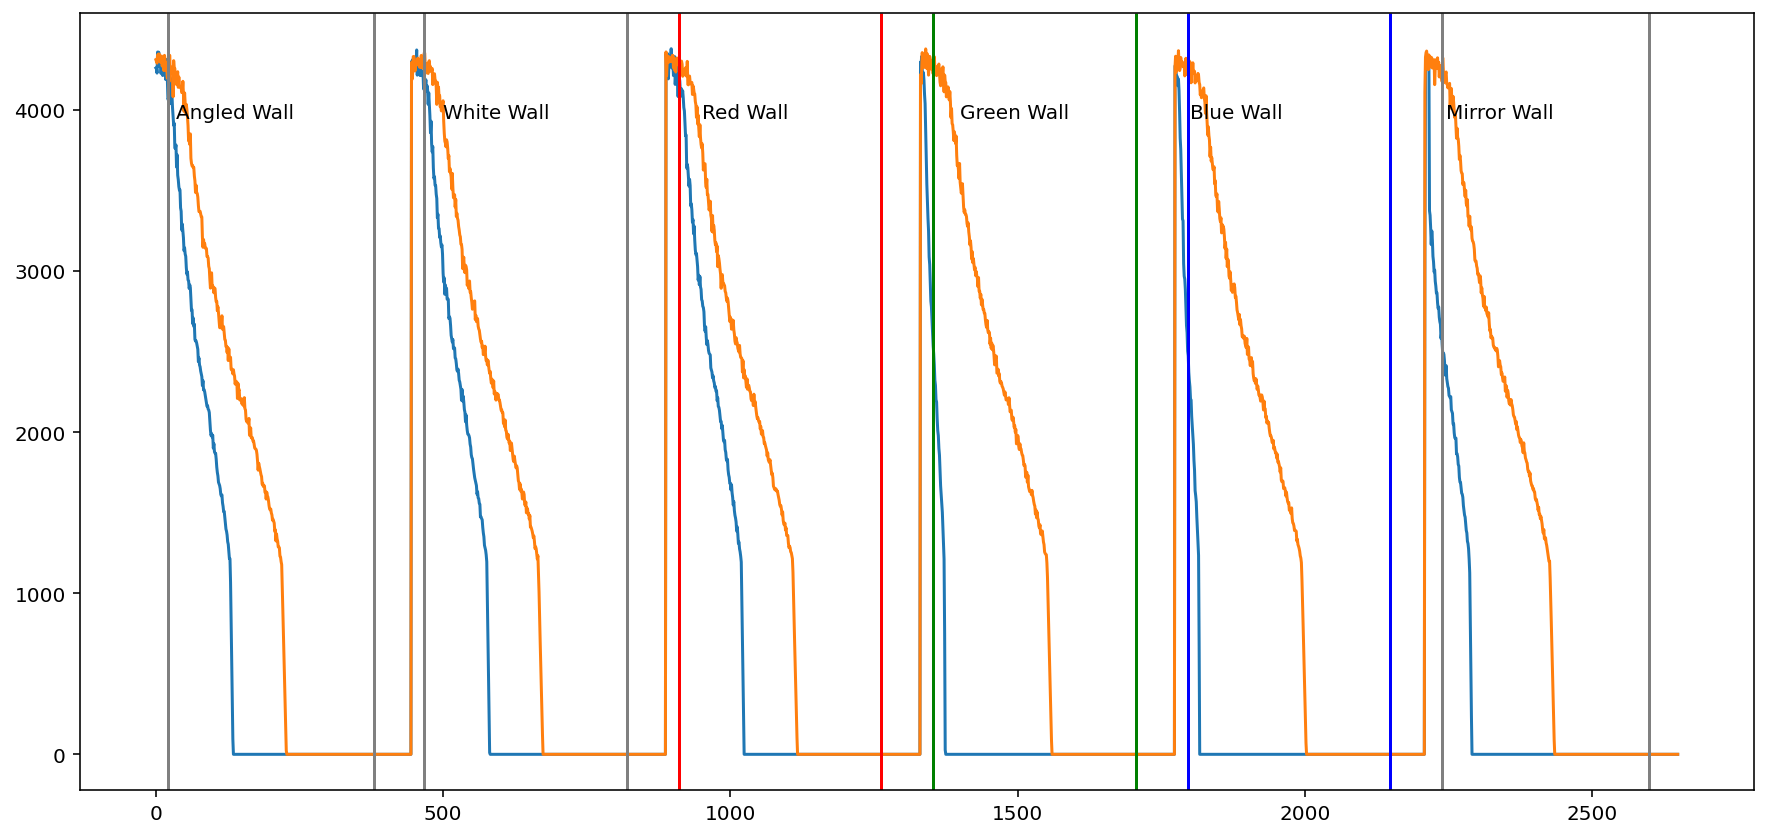

In [112]:
plt.figure(figsize=(15, 7), dpi=144)
ax=plt.subplot(111)
ax.plot(df.thymio)
ax.plot(df.laser)

# angled wall
ax.text(s = "Angled Wall", x=35, y=3950)
ax.vlines([21, 380], 0, 1, transform=ax.get_xaxis_transform(), colors="gray")

# white wall
ax.text(s = "White Wall", x=500, y=3950)
ax.vlines([467, 820], 0, 1, transform=ax.get_xaxis_transform(), colors='gray')

# red
ax.text(s = "Red Wall", x=950, y=3950)
ax.vlines([910, 1263], 0, 1, transform=ax.get_xaxis_transform(), colors='r')

# green
ax.text(s = "Green Wall", x=1400, y=3950)
ax.vlines([1353, 1706], 0, 1, transform=ax.get_xaxis_transform(), colors='g')

# blue
ax.text(s = "Blue Wall", x=1800, y=3950)
ax.vlines([1796, 2149], 0, 1, transform=ax.get_xaxis_transform(), colors='b')

# mirror
ax.text(s = "Mirror Wall", x=2245, y=3950)
ax.vlines([2239, 2599], 0, 1, transform=ax.get_xaxis_transform(), colors='gray')

plt.show()